# Algoritmos de optimización - Reto 2

Nombre: Jair Francisco Flores Farfan<br>
Github: https://github.com/jfloresf17/miar-viu/Algoritmos/Reto_2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

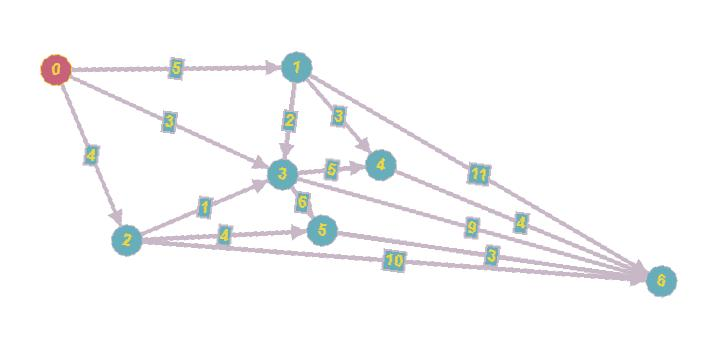

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

## Algoritmo de Dijkstra para el Descenso por el Río

El **algoritmo de Dijkstra** es un método eficiente para encontrar el camino de menor costo en un grafo dirigido con pesos no negativos. Se basa en la exploración iterativa de los caminos de menor costo y la actualización de las distancias a los nodos vecinos.

### **Fundamento Matemático**

El problema de la ruta más corta se define de la siguiente manera:

Dado un grafo dirigido $G = (V, E)$, donde:
- $ V $ es el conjunto de nodos (vértices).
- $ E $ es el conjunto de aristas con pesos asociados $w(u, v)$, donde $u, v \in V $.
- Un nodo origen $ s $ y un nodo destino $ t $.

Queremos encontrar la función de costo mínimo:

$ d(v) = \min_{u \in V} ( d(u) + w(u, v) )$

sujeta a la condición:
- $ d(s) = 0$, ya que la distancia al nodo origen es 0.
- $ d(v) = \infty$ para todos los demás nodos inicialmente.

El algoritmo mantiene una **cola de prioridad (heap)** donde en cada iteración selecciona el nodo con la distancia más corta y actualiza los valores de sus vecinos.

### **Cola de Prioridad**

Una **cola de prioridad** es una estructura de datos que permite acceder al elemento con la **mayor o menor prioridad** de manera eficiente. En el caso de Dijkstra, la prioridad está dada por la **distancia acumulada** del nodo, por lo que el nodo con la menor distancia es el primero en procesarse.

- Se implementa comúnmente con un **montículo binario (heap)**, lo que permite obtener el nodo con la menor distancia en $O(\log V)$.
- Se usa la función `heapq.heappush()` para insertar elementos y `heapq.heappop()` para extraer el nodo con la menor distancia.
- Gracias a la cola de prioridad, el algoritmo Dijkstra se ejecuta en **$O((V + E) \log V)$**, siendo mucho más eficiente que una implementación sin cola de prioridad $O(V^2)$.

### **Paso a Paso del Algoritmo**
1. **Inicialización**: Se establece la distancia del nodo origen como `0` y de los demás como `∞`.
2. **Exploración**: Se selecciona el nodo con la menor distancia acumulada y se actualizan sus vecinos.
3. **Actualización**: Si se encuentra un camino más corto a un vecino, se actualiza su costo y se almacena en la cola de prioridad.
4. **Finalización**: Se repite el proceso hasta que se alcanza el nodo final o se exploran todos los caminos posibles.
---

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################
import numpy as np
import heapq

def dijkstra(grafo, inicio, fin):
    """
    Encuentra el camino de menor costo en un grafo dirigido usando Dijkstra.

    Args:
    grafo (dict): Representación del grafo como diccionario de listas de adyacencia.
    inicio (int): Nodo de inicio.
    fin (int): Nodo final.

    Returns:
    tuple: Costo mínimo y el camino óptimo.
    """
    # Inicialización
    heap = [(0, inicio, [])]  # (costo acumulado, nodo actual, camino)
    costos = {nodo: float('inf') for nodo in grafo}
    costos[inicio] = 0
    
    while heap:
        costo_actual, nodo, camino = heapq.heappop(heap)
        
        # Si llegamos al nodo final, devolvemos el camino
        if nodo == fin:
            return costo_actual, camino + [nodo]
        
        # Explorar vecinos
        for vecino, peso in grafo[nodo]:
            nuevo_costo = costo_actual + peso
            if nuevo_costo < costos[vecino]:
                costos[vecino] = nuevo_costo
                heapq.heappush(heap, (nuevo_costo, vecino, camino + [nodo]))
    
    return float('inf'), []  # Si no hay camino

# Representación del grafo basado en la imagen
grafo = {
    0: [(1, 5), (2, 4), (3, 3)],
    1: [(3, 2), (4, 3)],
    2: [(3, 1), (5, 4)],
    3: [(4, 5), (5, 6)],
    4: [(6, 11)],
    5: [(6, 10), (6, 9), (6, 3)],
    6: []
}

# Ejecutar Dijkstra desde el nodo 0 al nodo 6
costo_minimo, camino_optimo = dijkstra(grafo, 0, 6)
print(f"Costo mínimo: {costo_minimo}")
print(f"Camino óptimo: {camino_optimo}")

Costo mínimo: 11
Camino óptimo: [0, 2, 5, 6]


## Descenso del gradiente

In [3]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [4]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

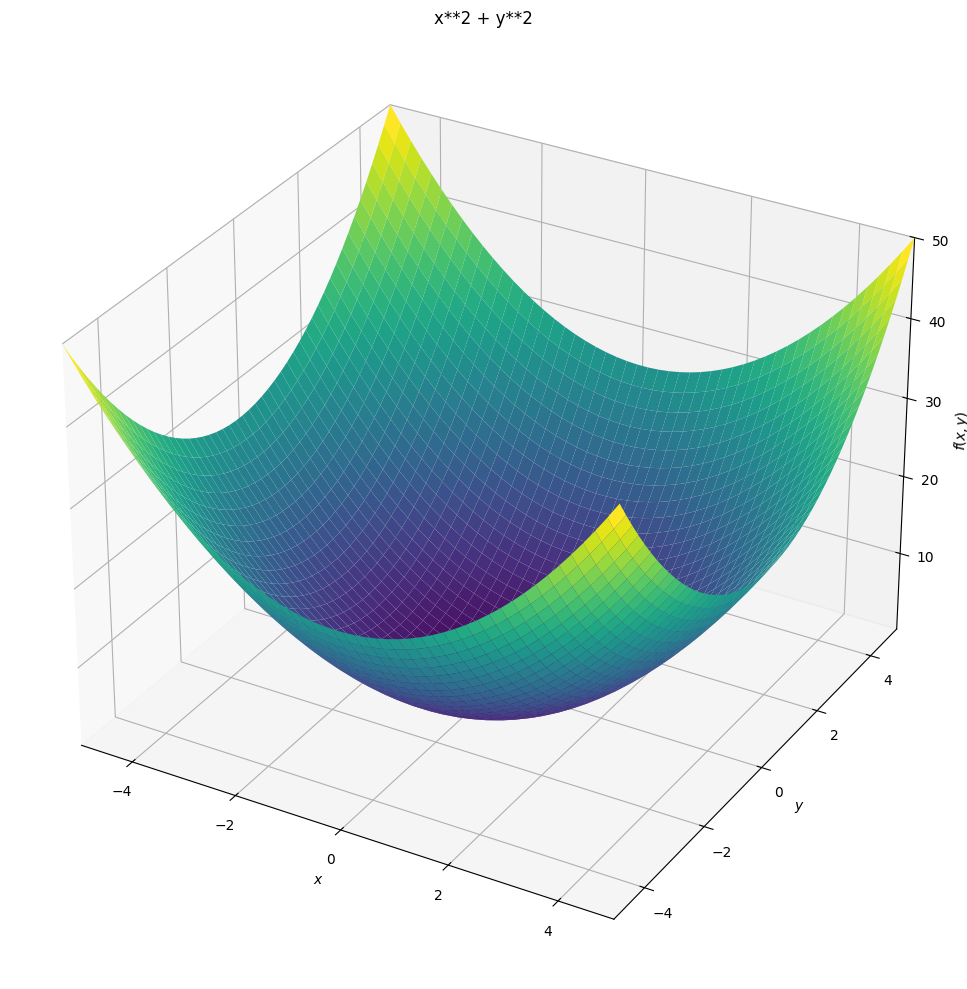

In [5]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

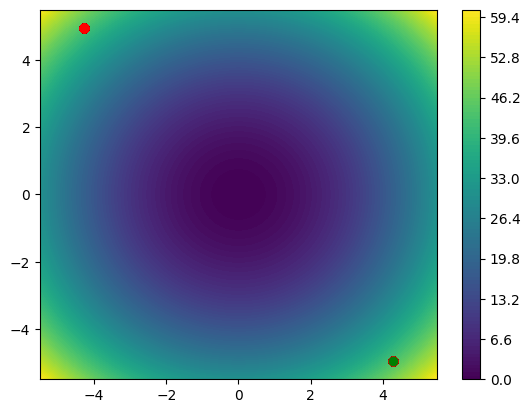

Solucion: [4.275460718943867, -4.9649390262079915] 42.930183893195164


In [6]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
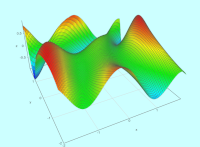


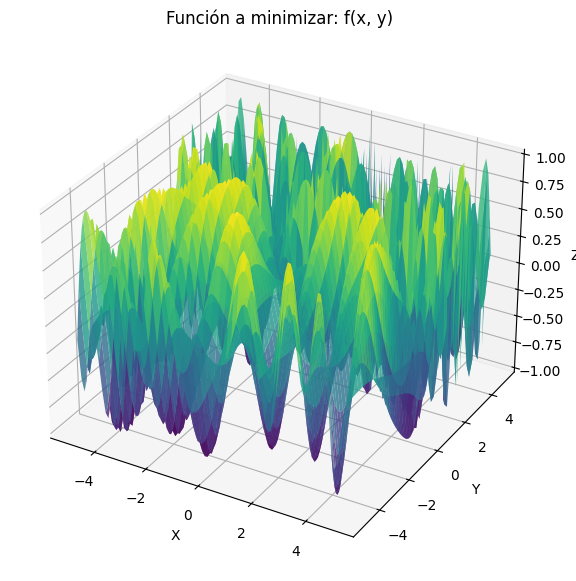

In [16]:
# Reimportar librerías debido al reinicio del estado de ejecución
def f(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Calcular gradientes parciales
def gradiente(x, y):
    df_dx = np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y)) * x \
          - 2 * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y))
    
    df_dy = -0.5 * y * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y)) \
          + np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y)) * np.exp(y)
    
    return np.array([df_dx, df_dy])

# Implementación del algoritmo de descenso del gradiente
def descenso_gradiente(lr=0.1, iteraciones=100, x_inicial=0, y_inicial=0):
    x, y = x_inicial, y_inicial
    trayectoria = [(x, y)]

    for _ in range(iteraciones):
        grad = gradiente(x, y)
        x -= lr * grad[0]
        y -= lr * grad[1]
        trayectoria.append((x, y))
    
    return np.array(trayectoria)

# Gráfica de la función
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Función a minimizar: f(x, y)')
plt.show()

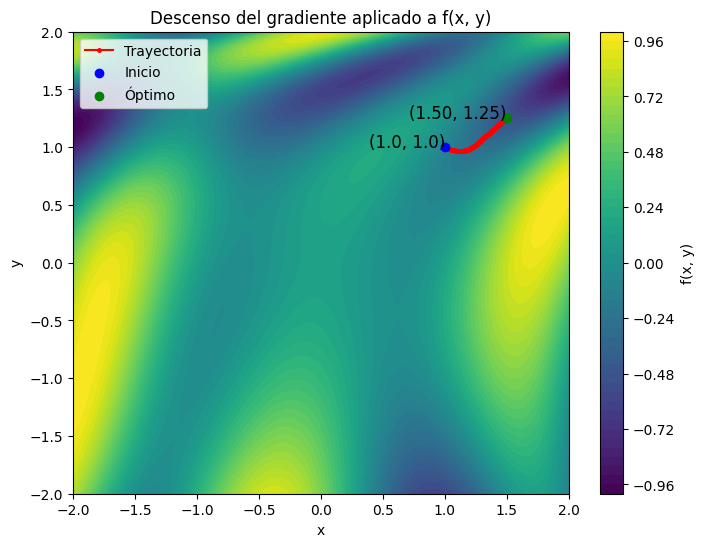

In [15]:
# Ejecutar el descenso del gradiente
trayectoria = descenso_gradiente(lr=0.01, iteraciones=100, x_inicial=1, y_inicial=1)

# Graficar la trayectoria del descenso del gradiente
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.plot(trayectoria[:, 0], trayectoria[:, 1], 'r.-', markersize=5, label="Trayectoria")
plt.scatter(trayectoria[0, 0], trayectoria[0, 1], color='blue', label="Inicio", zorder=3)
plt.text(trayectoria[0, 0], trayectoria[0, 1], f"({trayectoria[0][0]}, {trayectoria[0][1]})", fontsize=12, horizontalalignment='right')
plt.scatter(trayectoria[-1, 0], trayectoria[-1, 1], color='green', label="Óptimo", zorder=3)
plt.text(trayectoria[-1, 0], trayectoria[-1, 1], f"({trayectoria[-1][0]:.2f}, {trayectoria[-1][1]:.2f})", fontsize=12, horizontalalignment='right')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Descenso del gradiente aplicado a f(x, y)")
plt.show()